<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/Medical_Cost_Personal_nn_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Loading in dataset

In [63]:
dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [64]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [65]:
dataset = pd.get_dummies(dataset, dtype=np.float16)
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Normalizing columns

In [70]:
dataset['age'] = sklearn.preprocessing.MinMaxScaler().fit(pd.DataFrame(dataset['age'])).transform(pd.DataFrame(dataset['age']))
dataset['bmi'] = sklearn.preprocessing.MinMaxScaler().fit(pd.DataFrame(dataset['bmi'])).transform(pd.DataFrame(dataset['bmi']))
dataset['children'] = sklearn.preprocessing.MinMaxScaler().fit(pd.DataFrame(dataset['children'])).transform(pd.DataFrame(dataset['children']))
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,0.000000,0.562012,0.0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,0.065217,0.264730,0.0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

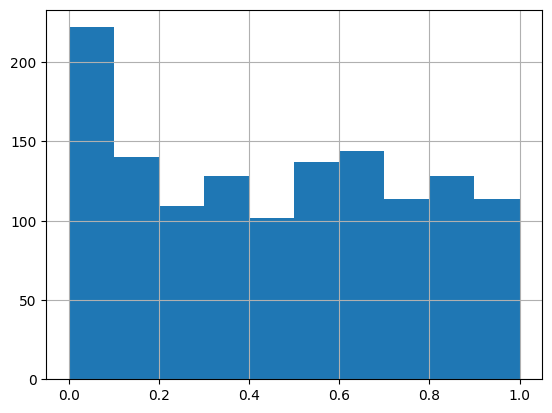

In [71]:
dataset['age'].hist()

<Axes: >

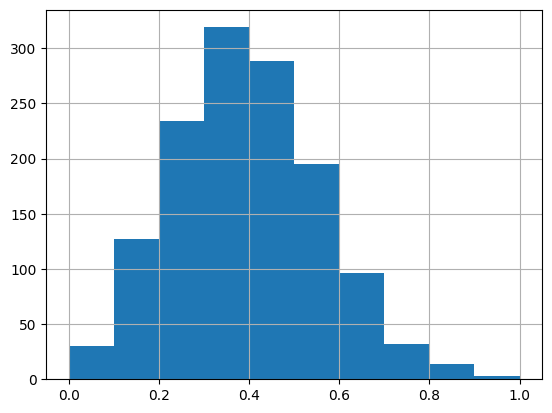

In [72]:
dataset['bmi'].hist()

<Axes: >

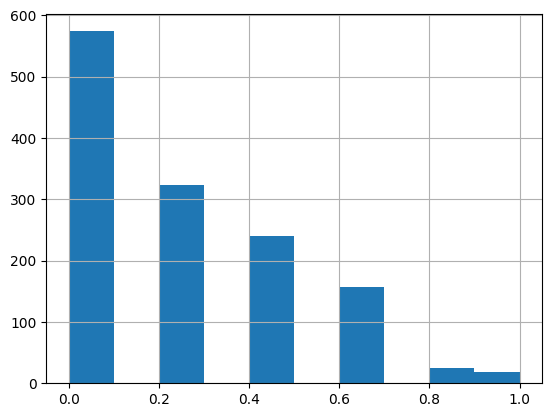

In [73]:
dataset['children'].hist()

## making X and Y

In [74]:
Y = dataset['charges']
X = dataset.drop('charges', axis=1)

X,Y

(           age       bmi  children  sex_female  sex_male  smoker_no  \
 0     0.021739  0.321227       0.0         1.0       0.0        0.0   
 1     0.000000  0.479150       0.2         0.0       1.0        1.0   
 2     0.217391  0.458434       0.6         0.0       1.0        1.0   
 3     0.326087  0.181464       0.0         0.0       1.0        1.0   
 4     0.304348  0.347592       0.0         0.0       1.0        1.0   
 ...        ...       ...       ...         ...       ...        ...   
 1333  0.695652  0.403820       0.6         0.0       1.0        1.0   
 1334  0.000000  0.429379       0.0         1.0       0.0        1.0   
 1335  0.000000  0.562012       0.0         1.0       0.0        1.0   
 1336  0.065217  0.264730       0.0         1.0       0.0        1.0   
 1337  0.934783  0.352704       0.0         1.0       0.0        0.0   
 
       smoker_yes  region_northeast  region_northwest  region_southeast  \
 0            1.0               0.0               0.0      

## Create test and train sets

In [75]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.2)

In [76]:
len(X_train), len(X_test)

(1070, 268)

## Create model

In [77]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13131.6768 - mae: 13131.6768
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13126.8828 - mae: 13126.8828 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13115.3555 - mae: 13115.3555
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13081.0303 - mae: 13081.0303
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12975.1426 - mae: 12975.1426
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12646.2568 - mae: 12646.2568 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11657.1885 - mae: 11657.1885
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9906.1729 - mae: 9906.1729   
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8596.7217 - mae: 8596.7217
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8155.9990 - mae: 8155.9990
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7942.8511 - mae: 7942.8511 
Epoch 12/100
34/34 ━━━━━━━━━━━━━

In [78]:
model.evaluate(X_test, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3850.5735 - mae: 3850.5735  


[3395.047607421875, 3395.047607421875]

## Improving model

In [79]:
#set random seeed

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['mae'])

model2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13130.7959 - mae: 13130.7959
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13124.3838 - mae: 13124.3838
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13108.0508 - mae: 13108.0508
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13071.9805 - mae: 13071.9805
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13005.1455 - mae: 13005.1455
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12896.5059 - mae: 12896.5059
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12735.5352 - mae: 12735.5352
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12512.0850 - mae: 12512.0850
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12216.2793 - mae: 12216.2793
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11839.8633 - mae: 11839.8633
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11390.1064 - mae: 11390.1064
Epoch 12/100
34/34 ━━━━━━━━━━━

In [80]:
model2.evaluate(X_test, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3755.6272 - mae: 3755.6272  


[3639.7587890625, 3639.7587890625]

### model 3

In [81]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['mae'])

history = model3.fit(X_train, Y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13130.6904 - mae: 13130.6904
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13122.7930 - mae: 13122.7930
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13102.7471 - mae: 13102.7471
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13059.5137 - mae: 13059.5137
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12981.9297 - mae: 12981.9297
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12859.2959 - mae: 12859.2959
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12680.7246 - mae: 12680.7246
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12435.9668 - mae: 12435.9668
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12115.5195 - mae: 12115.5195
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11714.2354 - mae: 11714.2354
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11243.3154 - mae: 11243.3154
Epoch 12/200
34/34 ━━━━━━━━━━━

In [82]:
model3.evaluate(X_test, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3848.0540 - mae: 3848.0540  


[3394.538330078125, 3394.538330078125]

## plot loss cruve

Text(0.5, 1.0, 'Loss cruve')

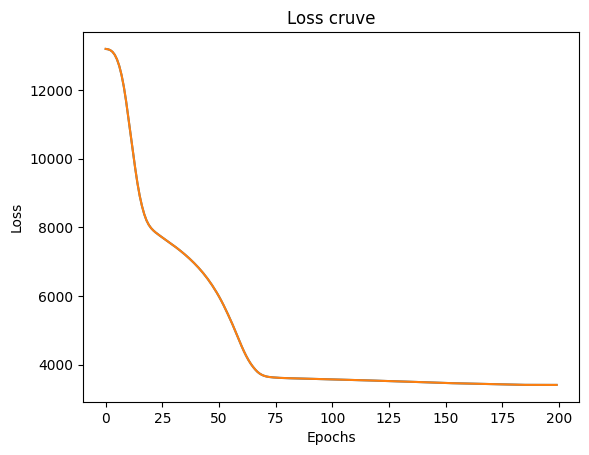

In [83]:
hist = pd.DataFrame(history.history)
plt.plot(hist)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss cruve")
